In [ ]:
%pip install requests
%pip install python-dotenv

# Fetch Movie Data from API

In [88]:
import requests
from dotenv import load_dotenv
import pandas as pd
import os
import time
import json

# Load variables from .env file
load_dotenv()

# Access the API access token
api_access_token = os.getenv('API_ACCESS_TOKEN')

# Base URL for TMDb API
BASE_URL = "https://api.themoviedb.org/3/movie"


# List of movie IDs to fetch
movie_ids = [0, 299534, 19995, 140607, 299536, 597, 135397, 420818, 24428,
             168259, 99861, 284054, 12445, 181808, 330457, 351286, 109445,
             321612, 260513]

def fetch_movie_data(movie_id):
    """
    Fetch details for a single movie using TMDb API and returns
    a JSON response containing movie details, or None if the request fails.
    """
    url = f"{BASE_URL}/{movie_id}?append_to_response=credits"
    # https://api.themoviedb.org/3/movie/11?append_to_response=videos
    # ?append_to_response=videos

    headers = {
        "accept": "application/json",
        "Authorization": f"Bearer {api_access_token}"
    }
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response.json()  # Return JSON data if successful
        else:
            print(f"Error {response.status_code} for movie_id={movie_id}")
            return None
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for movie_id={movie_id}: {e}")
        return None

def fetch_all_movies(movie_ids):
    """
    Fetch data for a list of movie IDs and returns
    a list of dictionaries containing movie details.
    """
    movies = []
    for movie_id in movie_ids:
        data = fetch_movie_data(movie_id)
        if data:  # Only add valid responses
            movies.append(data)
        time.sleep(0.1) # Rate limiting in place for future scalability; current usage stays within limits.

    return movies

def save_to_dataframe(movie_data):
    """
    Converts a list of movie data dictionaries into a Pandas DataFrame 
    returns Pandas DataFrame containing structured movie data.
    """
    df = pd.DataFrame(movie_data)
    return df

# Main process: Fetch movies and save as DataFrame
all_movies_data = fetch_all_movies(movie_ids)
movies_df = save_to_dataframe(all_movies_data)

# Save the data to a JSON file
with open("movies_raw.json", "w") as json_file:
    json.dump(all_movies_data, json_file, indent=4)

# Preview the DataFrame
pd.set_option('display.max_columns',None)
movies_df.head()


Error 404 for movie_id=0


,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,credits
0,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,[US],en,Avengers: Endgame,After the devastating events of Avengers: Infi...,24.2346,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,False,8.238,26214,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.avatar.com/movies/avatar,19995,tt0499549,[US],en,Avatar,"In the 22nd century, a paraplegic Marine is di...",32.6950,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"[{'id': 444, 'logo_path': None, 'name': 'Dune ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-15,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,False,7.588,32121,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,False,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,[US],en,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,13.1664,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,"[{'id': 1, 'logo_path': '/tlVSws0RvvtPBwViUyOF...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,2068223624,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.262,19667,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,[US],en,Avengers: Infinity War,As the Avengers and their allies have continue...,33.0700,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,2052415039,149,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Destiny arrives all the same.,Avengers: Infinity War,False,8.236,30391,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,False,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,None,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.paramountmovies.com/movies/titanic,597,tt0120338,[US],en,Titanic,101-year-old Rose DeWitt Bukater tells the sto...,38.6063,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,2264162353,194,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nothing on Earth could come between them.,Titanic,False,7.905,25869,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


# Data Preparation & Cleaning

## Data Preparation and Cleaning

### 1. Drop

In [89]:
# Drop irrelevant columns from the DataFrame
movies_df.drop(columns=['adult', 'imdb_id', 'original_title', 'video', 'homepage'], inplace=True)

# Display the first few rows to confirm changes
movies_df.head()


,backdrop_path,belongs_to_collection,budget,genres,id,origin_country,original_language,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,credits
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",299534,[US],en,After the devastating events of Avengers: Infi...,24.2346,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2019-04-24,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,8.238,26214,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",32.6950,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,"[{'id': 444, 'logo_path': None, 'name': 'Dune ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-15,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,7.588,32121,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",140607,[US],en,Thirty years after defeating the Galactic Empi...,13.1664,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,"[{'id': 1, 'logo_path': '/tlVSws0RvvtPBwViUyOF...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-12-15,2068223624,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,7.262,19667,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",299536,[US],en,As the Avengers and their allies have continue...,33.0700,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2018-04-25,2052415039,149,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Destiny arrives all the same.,Avengers: Infinity War,8.236,30391,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,None,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,38.6063,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,2264162353,194,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nothing on Earth could come between them.,Titanic,7.905,25869,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


### 2. Evaluate

In [90]:
movies_df[['belongs_to_collection', 'genres', 'production_countries',
'production_companies', 'spoken_languages']].head()

,belongs_to_collection,genres,production_countries,production_companies,spoken_languages
0,"{'id': 86311, 'name': 'The Avengers Collection...","[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'english_name': 'English', 'iso_639_1': 'en'..."
1,"{'id': 87096, 'name': 'Avatar Collection', 'po...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 444, 'logo_path': None, 'name': 'Dune ...","[{'english_name': 'English', 'iso_639_1': 'en'..."
2,"{'id': 10, 'name': 'Star Wars Collection', 'po...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 1, 'logo_path': '/tlVSws0RvvtPBwViUyOF...","[{'english_name': 'English', 'iso_639_1': 'en'..."
3,"{'id': 86311, 'name': 'The Avengers Collection...","[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...","[{'english_name': 'English', 'iso_639_1': 'en'..."
4,None,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'english_name': 'English', 'iso_639_1': 'en'..."


### 3. Extract

In [91]:
def extract_collection_name(df, source_column, target_column):
    df[target_column] = df[source_column].apply(lambda x: x.get('name') if pd.notna(x) else None)
    df.drop(columns=[source_column], inplace=True)
    return df

# Apply the function to your DataFrame
cleaned_movies_df = extract_collection_name(movies_df, 'belongs_to_collection', 'Collection name')

# Display the head of the new DataFrame
print(cleaned_movies_df[['Collection name']].head())


           Collection name
0  The Avengers Collection
1        Avatar Collection
2     Star Wars Collection
3  The Avengers Collection
4                     None


In [92]:
def extract_genre_names(df, source_column, target_column):
    # Extract and format genre names
    df[target_column] = df[source_column].apply(
        lambda x: '|'.join([genre['name'] for genre in x]) if isinstance(x, list) else None
    )
    # Drop the original column
    df.drop(columns=[source_column], inplace=True)
    return df

# Apply the function to your DataFrame
cleaned_movies_df = extract_genre_names(cleaned_movies_df, 'genres', 'Genre names')

# Display the head of the new DataFrame
print(cleaned_movies_df[['Genre names']].head())


                                Genre names
0          Adventure|Science Fiction|Action
1  Action|Adventure|Fantasy|Science Fiction
2          Adventure|Action|Science Fiction
3          Adventure|Action|Science Fiction
4                             Drama|Romance


In [93]:
def extract_spoken_languages(df, source_column, target_column):
    # Extract and format spoken languages
    df[target_column] = df[source_column].apply(
        lambda x: '|'.join([lang['english_name'] for lang in x]) if isinstance(x, list) else None
    )
    # Drop the original column
    df.drop(columns=[source_column], inplace=True)
    return df

# Apply the function to your DataFrame
cleaned_movies_df = extract_spoken_languages(cleaned_movies_df, 'spoken_languages', 'Spoken languages')

# Display the head of the DataFrame
print(cleaned_movies_df[['Spoken languages']].head())


                                Spoken languages
0                         English|Japanese|Xhosa
1                                English|Spanish
2                                        English
3                                  English|Xhosa
4  English|French|German|Swedish|Italian|Russian


In [94]:
def extract_production_countries(df, source_column, target_column):
    # Extract and format production countries
    df[target_column] = df[source_column].apply(
        lambda x: '|'.join([country['name'] for country in x]) if isinstance(x, list) else None
    )
    # Drop the original column
    df.drop(columns=[source_column], inplace=True)
    return df

# Apply the function to the DataFrame
cleaned_movies_df = extract_production_countries(cleaned_movies_df, 'production_countries', 'Production countries')

# Display the head of the DataFrame
print(cleaned_movies_df[['Production countries']].head())


                      Production countries
0                 United States of America
1  United States of America|United Kingdom
2                 United States of America
3                 United States of America
4                 United States of America


In [95]:
# Extract production company names and format them
cleaned_movies_df['Production companies'] = cleaned_movies_df['production_companies'].apply(lambda x: '|'.join([company['name'] for company in x]) if x else None)

# Drop the original column
cleaned_movies_df.drop(columns=['production_companies'], inplace=True)

cleaned_movies_df[['Production companies']].head()


,Production companies
0,Marvel Studios
1,Dune Entertainment|Lightstorm Entertainment|20...
2,Lucasfilm Ltd.|Bad Robot
3,Marvel Studios
4,Paramount Pictures|20th Century Fox|Lightstorm...


### Extract new columns from credits column

In [96]:
# Extract cast names as a pipe-separated string
cleaned_movies_df['cast'] = cleaned_movies_df['credits'].apply(
    lambda x: '|'.join([member['name'] for member in x['cast']]) if 'cast' in x and isinstance(x['cast'], list) else None
)

# Display the first few rows to verify the extracted 'cast' column
cleaned_movies_df[['cast']].head()

,cast
0,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...
1,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...
2,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
3,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...
4,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...


In [97]:
# Calculate and save the cast size
cleaned_movies_df['cast_size'] = cleaned_movies_df['credits'].apply(
    lambda x: len(x['cast']) if 'cast' in x and isinstance(x['cast'], list) else 0
)

# Display the first few rows of the 'cast_size' column to verify
cleaned_movies_df[['cast_size']].head()


,cast_size
0,105
1,65
2,182
3,69
4,116


In [98]:
# Extract director(s) from the 'crew' section of the 'credits' field
cleaned_movies_df['director'] = cleaned_movies_df['credits'].apply(
    lambda x: '|'.join([member['name'] for member in x['crew'] if member['job'] == 'Director']) 
    if 'crew' in x and isinstance(x['crew'], list) else None
)

# Display the first few rows of the 'director' column to verify
cleaned_movies_df[['director']].head()


,director
0,Anthony Russo|Joe Russo
1,James Cameron
2,J.J. Abrams
3,Joe Russo|Anthony Russo
4,James Cameron


In [99]:
# Calculate and save the crew size
cleaned_movies_df['crew_size'] = cleaned_movies_df['credits'].apply(
    lambda x: len(x['crew']) if 'crew' in x and isinstance(x['crew'], list) else 0
)

# Display the first few rows of the 'crew_size' column to verify
cleaned_movies_df[['crew_size']].head()


,crew_size
0,593
1,986
2,257
3,724
4,258


In [16]:
# Drop the 'credits' column from the DataFrame
cleaned_movies_df.drop(columns=['credits'], inplace=True)

# Display the first few rows of the updated DataFrame to confirm
cleaned_movies_df.head()

,backdrop_path,budget,id,origin_country,original_language,overview,popularity,poster_path,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,Collection name,Genre names,Spoken languages,Production countries,Production companies,cast,cast_size,director,crew_size
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,356000000,299534,[US],en,After the devastating events of Avengers: Infi...,24.2346,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,2019-04-24,2799439100,181,Released,Avenge the fallen.,Avengers: Endgame,8.238,26211,The Avengers Collection,Adventure|Science Fiction|Action,English|Japanese|Xhosa,United States of America,Marvel Studios,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo|Joe Russo,593
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",32.6950,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,2009-12-15,2923706026,162,Released,Enter the world of Pandora.,Avatar,7.588,32119,Avatar Collection,Action|Adventure|Fantasy|Science Fiction,English|Spanish,United States of America|United Kingdom,Dune Entertainment|Lightstorm Entertainment|20...,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,986
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,245000000,140607,[US],en,Thirty years after defeating the Galactic Empi...,13.1664,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,2015-12-15,2068223624,136,Released,Every generation has a story.,Star Wars: The Force Awakens,7.262,19667,Star Wars Collection,Adventure|Action|Science Fiction,English,United States of America,Lucasfilm Ltd.|Bad Robot,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,182,J.J. Abrams,257
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,300000000,299536,[US],en,As the Avengers and their allies have continue...,33.0700,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,2018-04-25,2052415039,149,Released,Destiny arrives all the same.,Avengers: Infinity War,8.236,30390,The Avengers Collection,Adventure|Action|Science Fiction,English|Xhosa,United States of America,Marvel Studios,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Anthony Russo|Joe Russo,724
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,200000000,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,38.6063,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,1997-11-18,2264162353,194,Released,Nothing on Earth could come between them.,Titanic,7.900,25867,None,Drama|Romance,English|French|German|Swedish|Italian|Russian,United States of America,Paramount Pictures|20th Century Fox|Lightstorm...,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,258


### 4. Inspect

In [100]:
def inspect_column_frequencies(df, columns):
    for column in columns:
        print(f"{column} Frequencies:")
        print(df[column].value_counts())
        print("\n" + "-" * 50 + "\n")

# List of columns to inspect
columns_to_inspect = ['Genre names', 'Spoken languages', 'Production countries', 'Production companies']

# Call the function to inspect the specified columns
inspect_column_frequencies(cleaned_movies_df, columns_to_inspect)


Genre names Frequencies:
Genre names
Adventure|Action|Science Fiction             3
Action|Adventure|Science Fiction|Thriller    2
Action|Adventure|Science Fiction             2
Adventure|Science Fiction|Action             1
Action|Adventure|Fantasy|Science Fiction     1
Drama|Romance                                1
Adventure|Drama|Family|Animation             1
Science Fiction|Action|Adventure             1
Action|Thriller|Crime                        1
Fantasy|Adventure                            1
Family|Animation|Adventure|Comedy|Fantasy    1
Animation|Family|Adventure|Fantasy           1
Family|Fantasy|Romance                       1
Action|Adventure|Animation|Family            1
Name: count, dtype: int64

--------------------------------------------------

Spoken languages Frequencies:
Spoken languages
English                                          9
English|Japanese|Xhosa                           1
English|Spanish                                  1
English|Xhosa             

## Handling Missing & Incorrect Data

In [101]:

cleaned_movies_df.head()

,backdrop_path,budget,id,origin_country,original_language,overview,popularity,poster_path,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,credits,Collection name,Genre names,Spoken languages,Production countries,Production companies,cast,cast_size,director,crew_size
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,356000000,299534,[US],en,After the devastating events of Avengers: Infi...,24.2346,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,2019-04-24,2799439100,181,Released,Avenge the fallen.,Avengers: Endgame,8.238,26214,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Adventure|Science Fiction|Action,English|Japanese|Xhosa,United States of America,Marvel Studios,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo|Joe Russo,593
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",32.6950,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,2009-12-15,2923706026,162,Released,Enter the world of Pandora.,Avatar,7.588,32121,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Avatar Collection,Action|Adventure|Fantasy|Science Fiction,English|Spanish,United States of America|United Kingdom,Dune Entertainment|Lightstorm Entertainment|20...,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,986
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,245000000,140607,[US],en,Thirty years after defeating the Galactic Empi...,13.1664,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,2015-12-15,2068223624,136,Released,Every generation has a story.,Star Wars: The Force Awakens,7.262,19667,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Star Wars Collection,Adventure|Action|Science Fiction,English,United States of America,Lucasfilm Ltd.|Bad Robot,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,182,J.J. Abrams,257
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,300000000,299536,[US],en,As the Avengers and their allies have continue...,33.0700,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,2018-04-25,2052415039,149,Released,Destiny arrives all the same.,Avengers: Infinity War,8.236,30391,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",The Avengers Collection,Adventure|Action|Science Fiction,English|Xhosa,United States of America,Marvel Studios,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Joe Russo|Anthony Russo,724
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,200000000,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,38.6063,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,1997-11-18,2264162353,194,Released,Nothing on Earth could come between them.,Titanic,7.905,25869,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",None,Drama|Romance,English|French|German|Swedish|Italian|Russian,United States of America,Paramount Pictures|20th Century Fox|Lightstorm...,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,258


### Convert column datatypes

In [19]:
cleaned_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   backdrop_path         18 non-null     object 
 1   budget                18 non-null     int64  
 2   id                    18 non-null     int64  
 3   origin_country        18 non-null     object 
 4   original_language     18 non-null     object 
 5   overview              18 non-null     object 
 6   popularity            18 non-null     float64
 7   poster_path           18 non-null     object 
 8   release_date          18 non-null     object 
 9   revenue               18 non-null     int64  
 10  runtime               18 non-null     int64  
 11  status                18 non-null     object 
 12  tagline               18 non-null     object 
 13  title                 18 non-null     object 
 14  vote_average          18 non-null     float64
 15  vote_count            18 

In [20]:
# Convert 'budget', 'id', and 'popularity' to numeric, setting invalid values to NaN
cleaned_movies_df['budget'] = pd.to_numeric(cleaned_movies_df['budget'], errors='coerce')
cleaned_movies_df['id'] = pd.to_numeric(cleaned_movies_df['id'], errors='coerce')
cleaned_movies_df['popularity'] = pd.to_numeric(cleaned_movies_df['popularity'], errors='coerce')

# Convert 'release_date' to datetime format, setting invalid values to NaT
cleaned_movies_df['release_date'] = pd.to_datetime(cleaned_movies_df['release_date'], errors='coerce')

cleaned_movies_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   backdrop_path         18 non-null     object        
 1   budget                18 non-null     int64         
 2   id                    18 non-null     int64         
 3   origin_country        18 non-null     object        
 4   original_language     18 non-null     object        
 5   overview              18 non-null     object        
 6   popularity            18 non-null     float64       
 7   poster_path           18 non-null     object        
 8   release_date          18 non-null     datetime64[ns]
 9   revenue               18 non-null     int64         
 10  runtime               18 non-null     int64         
 11  status                18 non-null     object        
 12  tagline               18 non-null     object        
 13  title                 

### Replace unrealistic values

In [21]:
# Convert 'budget' and 'revenue' to Million USD
cleaned_movies_df['budget'] = cleaned_movies_df['budget'] / 1_000_000  # Divide by 1 million
cleaned_movies_df['revenue'] = cleaned_movies_df['revenue'] / 1_000_000  # Divide by 1 million

# Display the first few rows of the updated columns to confirm the conversion
cleaned_movies_df[['budget', 'revenue']].head()


,budget,revenue
0,356.0,2799.439100
1,237.0,2923.706026
2,245.0,2068.223624
3,300.0,2052.415039
4,200.0,2264.162353


In [22]:
# Drop the 'status' column from the DataFrame
movies_df.drop(columns=['status'], inplace=True)

# Display the first few rows of the updated DataFrame
movies_df.head()

,backdrop_path,budget,id,origin_country,original_language,overview,popularity,poster_path,release_date,revenue,runtime,tagline,title,vote_average,vote_count,Collection name,Genre names,Spoken languages,Production countries,Production companies,cast,cast_size,director,crew_size
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,356.0,299534,[US],en,After the devastating events of Avengers: Infi...,24.2346,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,2019-04-24,2799.439100,181,Avenge the fallen.,Avengers: Endgame,8.238,26211,The Avengers Collection,Adventure|Science Fiction|Action,English|Japanese|Xhosa,United States of America,Marvel Studios,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo|Joe Russo,593
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237.0,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",32.6950,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,2009-12-15,2923.706026,162,Enter the world of Pandora.,Avatar,7.588,32119,Avatar Collection,Action|Adventure|Fantasy|Science Fiction,English|Spanish,United States of America|United Kingdom,Dune Entertainment|Lightstorm Entertainment|20...,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,986
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,245.0,140607,[US],en,Thirty years after defeating the Galactic Empi...,13.1664,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,2015-12-15,2068.223624,136,Every generation has a story.,Star Wars: The Force Awakens,7.262,19667,Star Wars Collection,Adventure|Action|Science Fiction,English,United States of America,Lucasfilm Ltd.|Bad Robot,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,182,J.J. Abrams,257
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,300.0,299536,[US],en,As the Avengers and their allies have continue...,33.0700,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,2018-04-25,2052.415039,149,Destiny arrives all the same.,Avengers: Infinity War,8.236,30390,The Avengers Collection,Adventure|Action|Science Fiction,English|Xhosa,United States of America,Marvel Studios,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Anthony Russo|Joe Russo,724
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,200.0,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,38.6063,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,1997-11-18,2264.162353,194,Nothing on Earth could come between them.,Titanic,7.900,25867,None,Drama|Romance,English|French|German|Swedish|Italian|Russian,United States of America,Paramount Pictures|20th Century Fox|Lightstorm...,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,258


## Reorder & Finalize DataFrame

In [23]:
cleaned_movies_df.to_csv('cleaned_movies.csv', index=False)


In [24]:
cleaned_movies_df.rename(columns={'revenue': 'revenue_musd', 'Collection name': 'belongs_to_collection', 'Genre names':'genres', 'Spoken languages':'spoken_languages', 'Production countries':'production_countries', 'Production companies':'production_companies', 'budget':'budget_musd'}, inplace=True)

cleaned_movies_df.head()

,backdrop_path,budget_musd,id,origin_country,original_language,overview,popularity,poster_path,release_date,revenue_musd,runtime,tagline,title,vote_average,vote_count,belongs_to_collection,genres,spoken_languages,production_countries,production_companies,cast,cast_size,director,crew_size
0,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,356.0,299534,[US],en,After the devastating events of Avengers: Infi...,24.2346,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,2019-04-24,2799.439100,181,Avenge the fallen.,Avengers: Endgame,8.238,26211,The Avengers Collection,Adventure|Science Fiction|Action,English|Japanese|Xhosa,United States of America,Marvel Studios,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo|Joe Russo,593
1,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237.0,19995,[US],en,"In the 22nd century, a paraplegic Marine is di...",32.6950,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,2009-12-15,2923.706026,162,Enter the world of Pandora.,Avatar,7.588,32119,Avatar Collection,Action|Adventure|Fantasy|Science Fiction,English|Spanish,United States of America|United Kingdom,Dune Entertainment|Lightstorm Entertainment|20...,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,986
2,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,245.0,140607,[US],en,Thirty years after defeating the Galactic Empi...,13.1664,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,2015-12-15,2068.223624,136,Every generation has a story.,Star Wars: The Force Awakens,7.262,19667,Star Wars Collection,Adventure|Action|Science Fiction,English,United States of America,Lucasfilm Ltd.|Bad Robot,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,182,J.J. Abrams,257
3,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,300.0,299536,[US],en,As the Avengers and their allies have continue...,33.0700,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,2018-04-25,2052.415039,149,Destiny arrives all the same.,Avengers: Infinity War,8.236,30390,The Avengers Collection,Adventure|Action|Science Fiction,English|Xhosa,United States of America,Marvel Studios,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Anthony Russo|Joe Russo,724
4,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,200.0,597,[US],en,101-year-old Rose DeWitt Bukater tells the sto...,38.6063,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,1997-11-18,2264.162353,194,Nothing on Earth could come between them.,Titanic,7.900,25867,None,Drama|Romance,English|French|German|Swedish|Italian|Russian,United States of America,Paramount Pictures|20th Century Fox|Lightstorm...,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,258


In [25]:
# Drop the 'status' column from the DataFrame
cleaned_movies_df.drop(columns=['backdrop_path', 'origin_country'], inplace=True)

# Display the first few rows of the updated DataFrame
cleaned_movies_df.head()

,budget_musd,id,original_language,overview,popularity,poster_path,release_date,revenue_musd,runtime,tagline,title,vote_average,vote_count,belongs_to_collection,genres,spoken_languages,production_countries,production_companies,cast,cast_size,director,crew_size
0,356.0,299534,en,After the devastating events of Avengers: Infi...,24.2346,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,2019-04-24,2799.439100,181,Avenge the fallen.,Avengers: Endgame,8.238,26211,The Avengers Collection,Adventure|Science Fiction|Action,English|Japanese|Xhosa,United States of America,Marvel Studios,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo|Joe Russo,593
1,237.0,19995,en,"In the 22nd century, a paraplegic Marine is di...",32.6950,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,2009-12-15,2923.706026,162,Enter the world of Pandora.,Avatar,7.588,32119,Avatar Collection,Action|Adventure|Fantasy|Science Fiction,English|Spanish,United States of America|United Kingdom,Dune Entertainment|Lightstorm Entertainment|20...,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,986
2,245.0,140607,en,Thirty years after defeating the Galactic Empi...,13.1664,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,2015-12-15,2068.223624,136,Every generation has a story.,Star Wars: The Force Awakens,7.262,19667,Star Wars Collection,Adventure|Action|Science Fiction,English,United States of America,Lucasfilm Ltd.|Bad Robot,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,182,J.J. Abrams,257
3,300.0,299536,en,As the Avengers and their allies have continue...,33.0700,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,2018-04-25,2052.415039,149,Destiny arrives all the same.,Avengers: Infinity War,8.236,30390,The Avengers Collection,Adventure|Action|Science Fiction,English|Xhosa,United States of America,Marvel Studios,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Anthony Russo|Joe Russo,724
4,200.0,597,en,101-year-old Rose DeWitt Bukater tells the sto...,38.6063,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,1997-11-18,2264.162353,194,Nothing on Earth could come between them.,Titanic,7.900,25867,None,Drama|Romance,English|French|German|Swedish|Italian|Russian,United States of America,Paramount Pictures|20th Century Fox|Lightstorm...,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,258


In [26]:
# Specify the desired order of columns
column_order = [
    'id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection',
    'original_language', 'budget_musd', 'revenue_musd', 'production_companies',
    'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime',
    'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director', 'crew_size'
]

# Reorder the DataFrame columns
cleaned_movies_df = cleaned_movies_df[column_order]

# Preview the reordered DataFrame
cleaned_movies_df.head()


,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,crew_size
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.439100,Marvel Studios,United States of America,26211,8.238,24.2346,181,After the devastating events of Avengers: Infi...,English|Japanese|Xhosa,/ulzhLuWrPK07P1YkdWQLZnQh1JL.jpg,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo|Joe Russo,593
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.706026,Dune Entertainment|Lightstorm Entertainment|20...,United States of America|United Kingdom,32119,7.588,32.6950,162,"In the 22nd century, a paraplegic Marine is di...",English|Spanish,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,986
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Adventure|Action|Science Fiction,Star Wars Collection,en,245.0,2068.223624,Lucasfilm Ltd.|Bad Robot,United States of America,19667,7.262,13.1664,136,Thirty years after defeating the Galactic Empi...,English,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,182,J.J. Abrams,257
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Adventure|Action|Science Fiction,The Avengers Collection,en,300.0,2052.415039,Marvel Studios,United States of America,30390,8.236,33.0700,149,As the Avengers and their allies have continue...,English|Xhosa,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Anthony Russo|Joe Russo,724
4,597,Titanic,Nothing on Earth could come between them.,1997-11-18,Drama|Romance,None,en,200.0,2264.162353,Paramount Pictures|20th Century Fox|Lightstorm...,United States of America,25867,7.900,38.6063,194,101-year-old Rose DeWitt Bukater tells the sto...,English|French|German|Swedish|Italian|Russian,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,258


### Reset Index

In [27]:
# # Reset the index of the DataFrame
# cleaned_movies_df.reset_index(drop=True, inplace=True)

# # Display the first few rows to confirm the changes
# cleaned_movies_df.head()


## KPI Implementation & Analysis

### Filter and rank movies based on:

Highest Revenue

In [28]:
# Filter and rank movies based on the highest revenue
highest_revenue_movies = cleaned_movies_df.sort_values(by='revenue_musd', ascending=False)

# Display the top 10 movies by highest revenue
highest_revenue_movies[['title', 'revenue_musd', 'release_date']].head(10)

,title,revenue_musd,release_date
1,Avatar,2923.706026,2009-12-15
0,Avengers: Endgame,2799.439100,2019-04-24
4,Titanic,2264.162353,1997-11-18
2,Star Wars: The Force Awakens,2068.223624,2015-12-15
3,Avengers: Infinity War,2052.415039,2018-04-25
5,Jurassic World,1671.537444,2015-06-06
6,The Lion King,1662.020819,2019-07-12
7,The Avengers,1518.815515,2012-04-25
8,Furious 7,1515.400000,2015-04-01
13,Frozen II,1453.683476,2019-11-20


Highest Budget

In [29]:
# Sort movies by 'budget_musd' in descending order
highest_budget_movies = cleaned_movies_df.sort_values(by='budget_musd', ascending=False)

# Display the top 10 movies by highest budget
highest_budget_movies[['title', 'budget_musd', 'release_date']].head(10)


,title,budget_musd,release_date
9,Avengers: Age of Ultron,365.0,2015-04-22
0,Avengers: Endgame,356.0,2019-04-24
3,Avengers: Infinity War,300.0,2018-04-25
6,The Lion King,260.0,2019-07-12
2,Star Wars: The Force Awakens,245.0,2015-12-15
1,Avatar,237.0,2009-12-15
7,The Avengers,220.0,2012-04-25
4,Titanic,200.0,1997-11-18
10,Black Panther,200.0,2018-02-13
12,Star Wars: The Last Jedi,200.0,2017-12-13


Highest Profit

In [30]:
# Calculate profit (Revenue - Budget) and add it as a new column
cleaned_movies_df.loc[:, 'profit_musd'] = cleaned_movies_df['revenue_musd'] - cleaned_movies_df['budget_musd']

# Sort movies by 'profit_musd' in descending order
highest_profit_movies = cleaned_movies_df.sort_values(by='profit_musd', ascending=False)

# Display the top 10 movies by profit
highest_profit_movies[['title', 'budget_musd', 'revenue_musd', 'profit_musd', 'release_date']].head(10)


C:\Users\DEVICES\AppData\Local\Temp\ipykernel_10528\3938369079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movies_df.loc[:, 'profit_musd'] = cleaned_movies_df['revenue_musd'] - cleaned_movies_df['budget_musd']


,title,budget_musd,revenue_musd,profit_musd,release_date
1,Avatar,237.0,2923.706026,2686.706026,2009-12-15
0,Avengers: Endgame,356.0,2799.439100,2443.439100,2019-04-24
4,Titanic,200.0,2264.162353,2064.162353,1997-11-18
2,Star Wars: The Force Awakens,245.0,2068.223624,1823.223624,2015-12-15
3,Avengers: Infinity War,300.0,2052.415039,1752.415039,2018-04-25
5,Jurassic World,150.0,1671.537444,1521.537444,2015-06-06
6,The Lion King,260.0,1662.020819,1402.020819,2019-07-12
8,Furious 7,190.0,1515.400000,1325.400000,2015-04-01
13,Frozen II,150.0,1453.683476,1303.683476,2019-11-20
7,The Avengers,220.0,1518.815515,1298.815515,2012-04-25


Lowest Profit

In [31]:
# Calculate profit (Revenue - Budget) and add it as a new column using loc to avoid SettingWithCopyWarning
cleaned_movies_df.loc[:, 'profit_musd'] = cleaned_movies_df['revenue_musd'] - cleaned_movies_df['budget_musd']

# Sort movies by 'profit_musd' in ascending order to find the lowest profit
lowest_profit_movies = cleaned_movies_df.sort_values(by='profit_musd', ascending=True)

# Display the bottom 10 movies by profit
lowest_profit_movies[['title', 'budget_musd', 'revenue_musd', 'profit_musd', 'release_date']].head(10)


,title,budget_musd,revenue_musd,profit_musd,release_date
9,Avengers: Age of Ultron,365.0,1405.403694,1040.403694,2015-04-22
17,Incredibles 2,200.0,1242.805359,1042.805359,2018-06-14
16,Beauty and the Beast,160.0,1266.115964,1106.115964,2017-03-16
15,Frozen,150.0,1274.219009,1124.219009,2013-11-20
12,Star Wars: The Last Jedi,200.0,1332.698830,1132.698830,2017-12-13
14,Jurassic World: Fallen Kingdom,170.0,1310.466296,1140.466296,2018-06-06
10,Black Panther,200.0,1349.926083,1149.926083,2018-02-13
11,Harry Potter and the Deathly Hallows: Part 2,125.0,1341.511219,1216.511219,2011-07-12
7,The Avengers,220.0,1518.815515,1298.815515,2012-04-25
13,Frozen II,150.0,1453.683476,1303.683476,2019-11-20


Highest ROI

In [32]:
# Step 1: Filter movies with Budget ≥ 10M USD
movies_with_valid_budget = cleaned_movies_df[cleaned_movies_df['budget_musd'] >= 10]

# Step 2: Calculate ROI as Revenue / Budget and add it as a new column
movies_with_valid_budget.loc[:, 'ROI'] = movies_with_valid_budget['revenue_musd'] / movies_with_valid_budget['budget_musd']

# Step 3: Sort movies by ROI in descending order
highest_roi_movies = movies_with_valid_budget.sort_values(by='ROI', ascending=False)

# Display the top 10 movies by ROI
highest_roi_movies[['title', 'budget_musd', 'revenue_musd', 'ROI', 'release_date']].head(10)


,title,budget_musd,revenue_musd,ROI,release_date
1,Avatar,237.0,2923.706026,12.336312,2009-12-15
4,Titanic,200.0,2264.162353,11.320812,1997-11-18
5,Jurassic World,150.0,1671.537444,11.143583,2015-06-06
11,Harry Potter and the Deathly Hallows: Part 2,125.0,1341.511219,10.732090,2011-07-12
13,Frozen II,150.0,1453.683476,9.691223,2019-11-20
15,Frozen,150.0,1274.219009,8.494793,2013-11-20
2,Star Wars: The Force Awakens,245.0,2068.223624,8.441729,2015-12-15
8,Furious 7,190.0,1515.400000,7.975789,2015-04-01
16,Beauty and the Beast,160.0,1266.115964,7.913225,2017-03-16
0,Avengers: Endgame,356.0,2799.439100,7.863593,2019-04-24


Lowest ROI

In [33]:
# Filter movies with budget ≥ 10M USD and calculate ROI
low_roi_movies = cleaned_movies_df[cleaned_movies_df['budget_musd'] >= 10].copy()
low_roi_movies.loc[:, 'ROI'] = low_roi_movies['revenue_musd'] / low_roi_movies['budget_musd']

# Sort by ROI (ascending to prioritize lowest values)
low_roi_movies_sorted = low_roi_movies.sort_values(by='ROI', ascending=True)

# Display the 10 movies with the lowest ROI
low_roi_movies_sorted[['title', 'budget_musd', 'revenue_musd', 'ROI', 'release_date']].head(10).round(2)


,title,budget_musd,revenue_musd,ROI,release_date
9,Avengers: Age of Ultron,365.0,1405.40,3.85,2015-04-22
17,Incredibles 2,200.0,1242.81,6.21,2018-06-14
6,The Lion King,260.0,1662.02,6.39,2019-07-12
12,Star Wars: The Last Jedi,200.0,1332.70,6.66,2017-12-13
10,Black Panther,200.0,1349.93,6.75,2018-02-13
3,Avengers: Infinity War,300.0,2052.42,6.84,2018-04-25
7,The Avengers,220.0,1518.82,6.90,2012-04-25
14,Jurassic World: Fallen Kingdom,170.0,1310.47,7.71,2018-06-06
0,Avengers: Endgame,356.0,2799.44,7.86,2019-04-24
16,Beauty and the Beast,160.0,1266.12,7.91,2017-03-16


Most Voted Movies

In [34]:
# Filter and rank movies based on most votes
most_voted_movies = cleaned_movies_df.sort_values(by='vote_count', ascending=False)

# Display the top 10 movies by vote count
most_voted_movies[['title', 'vote_count', 'vote_average', 'release_date']].head(10)

,title,vote_count,vote_average,release_date
1,Avatar,32119,7.588,2009-12-15
7,The Avengers,31510,7.734,2012-04-25
3,Avengers: Infinity War,30390,8.236,2018-04-25
0,Avengers: Endgame,26211,8.238,2019-04-24
4,Titanic,25867,7.900,1997-11-18
9,Avengers: Age of Ultron,23349,7.271,2015-04-22
10,Black Panther,22490,7.373,2018-02-13
11,Harry Potter and the Deathly Hallows: Part 2,20938,8.087,2011-07-12
5,Jurassic World,20626,6.693,2015-06-06
2,Star Wars: The Force Awakens,19667,7.262,2015-12-15


Highest Rated Movies

In [35]:
# Step 1: Filter movies with at least 10 votes
movies_with_min_votes = cleaned_movies_df[cleaned_movies_df['vote_count'] >= 10]

# Step 2: Sort by 'vote_average' in descending order
highest_rated_movies = movies_with_min_votes.sort_values(by='vote_average', ascending=False)

# Step 3: Display the top 10 highest-rated movies
highest_rated_movies[['title', 'vote_average', 'vote_count', 'release_date']].head(10)


,title,vote_average,vote_count,release_date
0,Avengers: Endgame,8.238,26211,2019-04-24
3,Avengers: Infinity War,8.236,30390,2018-04-25
11,Harry Potter and the Deathly Hallows: Part 2,8.087,20938,2011-07-12
4,Titanic,7.900,25867,1997-11-18
7,The Avengers,7.734,31510,2012-04-25
1,Avatar,7.588,32119,2009-12-15
17,Incredibles 2,7.454,13024,2018-06-14
10,Black Panther,7.373,22490,2018-02-13
9,Avengers: Age of Ultron,7.271,23349,2015-04-22
2,Star Wars: The Force Awakens,7.262,19667,2015-12-15


Lowest Rated Movies

In [36]:
# Step 1: Filter movies with at least 10 votes
movies_with_min_votes = cleaned_movies_df[cleaned_movies_df['vote_count'] >= 10]

# Step 2: Sort by 'vote_average' in ascending order
lowest_rated_movies = movies_with_min_votes.sort_values(by='vote_average', ascending=True)

# Step 3: Display the bottom 10 movies by ratings
lowest_rated_movies[['title', 'vote_average', 'vote_count', 'release_date']].head(10)


,title,vote_average,vote_count,release_date
14,Jurassic World: Fallen Kingdom,6.538,12005,2018-06-06
5,Jurassic World,6.693,20626,2015-06-06
12,Star Wars: The Last Jedi,6.780,15534,2017-12-13
16,Beauty and the Beast,6.971,15584,2017-03-16
6,The Lion King,7.109,10302,2019-07-12
8,Furious 7,7.225,10762,2015-04-01
15,Frozen,7.247,16782,2013-11-20
13,Frozen II,7.250,9869,2019-11-20
2,Star Wars: The Force Awakens,7.262,19667,2015-12-15
9,Avengers: Age of Ultron,7.271,23349,2015-04-22


Most Popular Movies

In [37]:
# Sort movies by 'popularity' in descending order
most_popular_movies = cleaned_movies_df.sort_values(by='popularity', ascending=False)

# Display the top 10 most popular movies
most_popular_movies[['title', 'popularity', 'release_date', 'vote_count', 'vote_average']].head(10)

,title,popularity,release_date,vote_count,vote_average
4,Titanic,38.6063,1997-11-18,25867,7.900
7,The Avengers,34.6271,2012-04-25,31510,7.734
3,Avengers: Infinity War,33.0700,2018-04-25,30390,8.236
1,Avatar,32.6950,2009-12-15,32119,7.588
0,Avengers: Endgame,24.2346,2019-04-24,26211,8.238
6,The Lion King,21.9093,2019-07-12,10302,7.109
15,Frozen,21.2794,2013-11-20,16782,7.247
11,Harry Potter and the Deathly Hallows: Part 2,18.3030,2011-07-12,20938,8.087
5,Jurassic World,18.1524,2015-06-06,20626,6.693
16,Beauty and the Beast,17.7192,2017-03-16,15584,6.971


Define a User-Defined Function (UDF) to streamline ranking operations.

In [38]:
def rank_movies(df, sort_column, filter_column=None, filter_value=None, top_n=10, ascending=False):
    """
    Filter and rank movies based on a specific column.
    
    Args:
        df (pd.DataFrame): The DataFrame containing movie data.
        sort_column (str): Column name to rank by (e.g., 'revenue_musd', 'budget_musd').
        filter_column (str, optional): Column to filter by (e.g., 'budget_musd'). Default is None.
        filter_value (numeric, optional): Minimum value for filtering (e.g., 10). Default is None.
        top_n (int, optional): Number of top results to return. Default is 10.
        ascending (bool, optional): Whether to sort in ascending order. Default is False.
    
    Returns:
        pd.DataFrame: Filtered and ranked DataFrame.
    """
    # Apply filtering if a filter_column and filter_value are provided
    if filter_column and filter_value is not None:
        df = df[df[filter_column] >= filter_value]
    
    # Sort the DataFrame by the specified column
    ranked_df = df.sort_values(by=sort_column, ascending=ascending)
    
    # Return the top_n rows
    return ranked_df.head(top_n)


In [39]:
# example use

top_revenue_movies = rank_movies(cleaned_movies_df, sort_column='revenue_musd', top_n=10)
print(top_revenue_movies[['title', 'revenue_musd', 'release_date']])


                           title  revenue_musd release_date
1                         Avatar   2923.706026   2009-12-15
0              Avengers: Endgame   2799.439100   2019-04-24
4                        Titanic   2264.162353   1997-11-18
2   Star Wars: The Force Awakens   2068.223624   2015-12-15
3         Avengers: Infinity War   2052.415039   2018-04-25
5                 Jurassic World   1671.537444   2015-06-06
6                  The Lion King   1662.020819   2019-07-12
7                   The Avengers   1518.815515   2012-04-25
8                      Furious 7   1515.400000   2015-04-01
13                     Frozen II   1453.683476   2019-11-20


## Advanced Movie Filtering & Search Queries

### Filter the dataset for specific queries:

Best-rated Science Fiction Action movies starring Bruce
Willis

In [40]:
# Step 1: Filter Science Fiction Action movies
sf_action_filter = (
    cleaned_movies_df['genres'].str.contains('Science Fiction', case=False) & 
    cleaned_movies_df['genres'].str.contains('Action', case=False)
)

# Step 2: Filter movies starring Bruce Willis
bruce_willis_filter = cleaned_movies_df['cast'].str.contains('Bruce Willis', case=False)

# Step 3: Apply both filters and sort by rating
filtered_movies = cleaned_movies_df[sf_action_filter & bruce_willis_filter]
sorted_movies = filtered_movies.sort_values(by='vote_average', ascending=False)

# Display results
if not sorted_movies.empty:
    print(sorted_movies[['title', 'vote_average', 'genres', 'cast']])
else:
    print("No movies found matching the criteria.")


No movies found matching the criteria.


Movies starring Uma Thurman, directed by Quentin Tarantino

In [41]:
# Step 1: Filter movies starring Uma Thurman
uma_thurman_filter = cleaned_movies_df['cast'].str.contains('Uma Thurman', case=False, na=False)

# Step 2: Filter movies directed by Quentin Tarantino
tarantino_filter = cleaned_movies_df['director'].str.contains('Quentin Tarantino', case=False, na=False)

# Step 3: Apply both filters and sort by runtime (ascending order)
filtered_movies = cleaned_movies_df[uma_thurman_filter & tarantino_filter]
sorted_movies = filtered_movies.sort_values(by='runtime', ascending=True)

# Display relevant columns
sorted_movies[['title', 'runtime', 'release_date', 'vote_average', 'genres']]


,title,runtime,release_date,vote_average,genres


## Franchise vs. Standalone Movie Performance

### Compare movie franchises (belongs_to_collection) vs. standalone movies

Mean Revenue

In [42]:
# Step 1: Separate movies into franchises and standalone movies
franchise_movies = cleaned_movies_df[~cleaned_movies_df['belongs_to_collection'].isna()]
standalone_movies = cleaned_movies_df[cleaned_movies_df['belongs_to_collection'].isna()]

# Step 2: Calculate mean revenue for each group
mean_revenue_franchise = franchise_movies['revenue_musd'].mean()
mean_revenue_standalone = standalone_movies['revenue_musd'].mean()

# Step 3: Display results
print(f"Mean Revenue (Franchise Movies): {mean_revenue_franchise:.2f} million USD")
print(f"Mean Revenue (Standalone Movies): {mean_revenue_standalone:.2f} million USD")


Mean Revenue (Franchise Movies): 1682.64 million USD
Mean Revenue (Standalone Movies): 1765.14 million USD


Median ROI

In [43]:
# Step 1: Ensure ROI column exists (Revenue / Budget) using .loc to avoid SettingWithCopyWarning
cleaned_movies_df.loc[:, 'ROI'] = cleaned_movies_df['revenue_musd'] / cleaned_movies_df['budget_musd']

# Step 2: Separate franchise and standalone movies
franchise_movies = cleaned_movies_df[~cleaned_movies_df['belongs_to_collection'].isna()]
standalone_movies = cleaned_movies_df[cleaned_movies_df['belongs_to_collection'].isna()]

# Step 3: Calculate median ROI for each group
median_roi_franchise = franchise_movies['ROI'].median()
median_roi_standalone = standalone_movies['ROI'].median()

# Step 4: Display results
print(f"Median ROI (Franchise Movies): {median_roi_franchise:.2f}")
print(f"Median ROI (Standalone Movies): {median_roi_standalone:.2f}")


Median ROI (Franchise Movies): 7.79
Median ROI (Standalone Movies): 9.62


C:\Users\DEVICES\AppData\Local\Temp\ipykernel_10528\3631987888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movies_df.loc[:, 'ROI'] = cleaned_movies_df['revenue_musd'] / cleaned_movies_df['budget_musd']


Mean Budget Raised

In [44]:
# Step 1: Separate movies into franchise and standalone groups
franchise_movies = cleaned_movies_df[~cleaned_movies_df['belongs_to_collection'].isna()]
standalone_movies = cleaned_movies_df[cleaned_movies_df['belongs_to_collection'].isna()]

# Step 2: Calculate mean budget for each group
mean_budget_franchise = franchise_movies['budget_musd'].mean()
mean_budget_standalone = standalone_movies['budget_musd'].mean()

# Step 3: Display results
print(f"Mean Budget (Franchise Movies): {mean_budget_franchise:.2f} million USD")
print(f"Mean Budget (Standalone Movies): {mean_budget_standalone:.2f} million USD")


Mean Budget (Franchise Movies): 219.88 million USD
Mean Budget (Standalone Movies): 180.00 million USD


Mean Popularity

In [45]:
# Step 1: Separate movies into franchise and standalone groups
franchise_movies = cleaned_movies_df[~cleaned_movies_df['belongs_to_collection'].isna()]
standalone_movies = cleaned_movies_df[cleaned_movies_df['belongs_to_collection'].isna()]

# Step 2: Calculate mean popularity for each group
mean_popularity_franchise = franchise_movies['popularity'].mean()
mean_popularity_standalone = standalone_movies['popularity'].mean()

# Step 3: Display results
print(f"Mean Popularity (Franchise Movies): {mean_popularity_franchise:.2f}")
print(f"Mean Popularity (Standalone Movies): {mean_popularity_standalone:.2f}")


Mean Popularity (Franchise Movies): 19.62
Mean Popularity (Standalone Movies): 28.16


Mean Rating

In [46]:
# Step 1: Separate movies into franchise and standalone groups
franchise_movies = cleaned_movies_df[~cleaned_movies_df['belongs_to_collection'].isna()]
standalone_movies = cleaned_movies_df[cleaned_movies_df['belongs_to_collection'].isna()]

# Step 2: Calculate mean rating for each group
mean_rating_franchise = franchise_movies['vote_average'].mean()
mean_rating_standalone = standalone_movies['vote_average'].mean()

# Step 3: Display results
print(f"Mean Rating (Franchise Movies): {mean_rating_franchise:.2f}")
print(f"Mean Rating (Standalone Movies): {mean_rating_standalone:.2f}")


Mean Rating (Franchise Movies): 7.38
Mean Rating (Standalone Movies): 7.44


## Most Successful Franchises & Directors

### Most Successful Movie Franchises

Total number of movies in franchise

In [47]:
# Step 1: Group movies by 'belongs_to_collection' and count the number of movies in each franchise
franchise_counts = (
    cleaned_movies_df['belongs_to_collection']
    .dropna()  # Remove standalone movies (null collections)
    .value_counts()  # Count occurrences (number of movies in each franchise)
)

# Step 2: Convert to DataFrame for better analysis
franchise_counts_df = franchise_counts.reset_index()
franchise_counts_df.columns = ['Franchise', 'Total Movies']

# Step 3: Display the top franchises by movie count
print(franchise_counts_df.head(10))


                             Franchise  Total Movies
0              The Avengers Collection             4
1                 Star Wars Collection             2
2             Jurassic Park Collection             2
3                    Frozen Collection             2
4                    Avatar Collection             1
5    The Lion King (Reboot) Collection             1
6  The Fast and the Furious Collection             1
7             Black Panther Collection             1
8              Harry Potter Collection             1
9           The Incredibles Collection             1


Total & Mean Budget

In [48]:
# Step 1: Filter out standalone movies and group by franchise
franchise_data = cleaned_movies_df[~cleaned_movies_df['belongs_to_collection'].isna()]
grouped_franchises = franchise_data.groupby('belongs_to_collection')

# Step 2: Calculate Total and Mean Budget for each franchise
franchise_budget_stats = grouped_franchises['budget_musd'].agg(['sum', 'mean']).reset_index()
franchise_budget_stats.columns = ['Franchise', 'Total Budget', 'Mean Budget']

# Step 3: Sort results by Total Budget (descending order)
sorted_franchise_budget = franchise_budget_stats.sort_values(by='Total Budget', ascending=False)

# Step 4: Display the top 10 franchises by Total and Mean Budget
print(sorted_franchise_budget.head(10))


                             Franchise  Total Budget  Mean Budget
6              The Avengers Collection        1241.0       310.25
5                 Star Wars Collection         445.0       222.50
4             Jurassic Park Collection         320.0       160.00
2                    Frozen Collection         300.0       150.00
9    The Lion King (Reboot) Collection         260.0       260.00
0                    Avatar Collection         237.0       237.00
1             Black Panther Collection         200.0       200.00
8           The Incredibles Collection         200.0       200.00
7  The Fast and the Furious Collection         190.0       190.00
3              Harry Potter Collection         125.0       125.00


Total & Mean Revenue

In [49]:
# Step 1: Filter out standalone movies
franchise_movies = cleaned_movies_df[~cleaned_movies_df['belongs_to_collection'].isna()]

# Step 2: Group by franchise and calculate total and mean revenue
franchise_revenue_stats = (
    franchise_movies.groupby('belongs_to_collection')['revenue_musd']
    .agg(['sum', 'mean'])
    .reset_index()
    .rename(columns={'sum': 'Total Revenue', 'mean': 'Mean Revenue', 'belongs_to_collection': 'Franchise'})
)

# Step 3: Sort by Total Revenue in descending order
franchise_revenue_stats = franchise_revenue_stats.sort_values(by='Total Revenue', ascending=False)

# Step 4: Display the table
print(franchise_revenue_stats.head(10).to_string(index=False))


                          Franchise  Total Revenue  Mean Revenue
            The Avengers Collection    7776.073348   1944.018337
               Star Wars Collection    3400.922454   1700.461227
           Jurassic Park Collection    2982.003740   1491.001870
                  Avatar Collection    2923.706026   2923.706026
                  Frozen Collection    2727.902485   1363.951242
  The Lion King (Reboot) Collection    1662.020819   1662.020819
The Fast and the Furious Collection    1515.400000   1515.400000
           Black Panther Collection    1349.926083   1349.926083
            Harry Potter Collection    1341.511219   1341.511219
         The Incredibles Collection    1242.805359   1242.805359


In [50]:
# Step 1: Filter out standalone movies and group by franchise
franchise_movies = cleaned_movies_df[~cleaned_movies_df['belongs_to_collection'].isna()]

# Step 2: Group by franchise and calculate mean rating
franchise_rating_stats = (
    franchise_movies.groupby('belongs_to_collection')['vote_average']
    .mean()
    .reset_index()
    .rename(columns={'belongs_to_collection': 'Franchise', 'vote_average': 'Mean Rating'})
)

# Step 3: Sort by Mean Rating in descending order
sorted_franchise_ratings = franchise_rating_stats.sort_values(by='Mean Rating', ascending=False)

# Step 4: Display the top franchises by mean rating
print(sorted_franchise_ratings.head(10).to_string(index=False))


                          Franchise  Mean Rating
            Harry Potter Collection      8.08700
            The Avengers Collection      7.86975
                  Avatar Collection      7.58800
         The Incredibles Collection      7.45400
           Black Panther Collection      7.37300
                  Frozen Collection      7.24850
The Fast and the Furious Collection      7.22500
  The Lion King (Reboot) Collection      7.10900
               Star Wars Collection      7.02100
           Jurassic Park Collection      6.61550


### Most Successful Directors

Total Number of Movies Directed

In [51]:
# Step 1: Split the 'director' column (since it contains multiple directors in a pipe-separated format)
cleaned_movies_df['director'] = cleaned_movies_df['director'].str.split('|')

# Step 2: Explode the 'director' column to create a row for each director (1 movie per row per director)
director_df = cleaned_movies_df.explode('director')

# Step 3: Group by the 'director' column and count the number of movies
director_movie_counts = director_df.groupby('director').size().reset_index(name='Total Movies Directed')

# Step 4: Sort the directors by total number of movies directed (descending order)
top_directors = director_movie_counts.sort_values('Total Movies Directed', ascending=False)

# Step 5: Display the top 10 directors
print("Top Directors by Total Number of Movies Directed:")
print(top_directors.head(10).to_string(index=False))


Top Directors by Total Number of Movies Directed:
       director  Total Movies Directed
  Anthony Russo                      2
     Chris Buck                      2
  James Cameron                      2
   Jennifer Lee                      2
      Joe Russo                      2
    Joss Whedon                      2
    Bill Condon                      1
      Brad Bird                      1
Colin Trevorrow                      1
    David Yates                      1


C:\Users\DEVICES\AppData\Local\Temp\ipykernel_10528\2342920284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movies_df['director'] = cleaned_movies_df['director'].str.split('|')


Total Revenue

In [53]:
# Step 1: Handle multiple directors by splitting and exploding the 'director' column
director_df = cleaned_movies_df.copy()

# Remove rows where 'director' is null
director_df = director_df[director_df['director'].notna()]

# Split the 'director' column into lists (in case of pipe-separated multiple directors) and explode
director_df['director'] = director_df['director'].str.split('|')
director_df = director_df.explode('director')

# Step 2: Group by 'director' and calculate total revenue
director_revenue_stats = director_df.groupby('director')['revenue_musd'].sum().reset_index()

# Step 3: Sort directors by total revenue in descending order
director_revenue_stats = director_revenue_stats.sort_values(by='revenue_musd', ascending=False)

# Step 4: Display the top 10 directors by total revenue
print("Top Directors by Total Revenue:")
print(director_revenue_stats.head(10).round(2).to_string(index=False))


Top Directors by Total Revenue:
Empty DataFrame
Columns: [director, revenue_musd]
Index: []


Mean Rating

In [54]:
# Step 1: Handle multiple directors (pipe-separated format) by splitting and exploding the 'director' column
director_df = cleaned_movies_df.copy()

# Filter rows with non-null 'director' values
director_df = director_df[director_df['director'].notna()]

# Split the 'director' column into lists and explode into individual rows for each director
director_df['director'] = director_df['director'].str.split('|')
director_df = director_df.explode('director')

# Step 2: Group by 'director' and calculate the mean rating
director_mean_rating = director_df.groupby('director')['vote_average'].mean().reset_index()

# Step 3: Sort directors by mean rating in descending order
director_mean_rating = director_mean_rating.sort_values(by='vote_average', ascending=False)

# Step 4: Display the top 10 directors by mean rating
print("Top Directors by Mean Rating:")
print(director_mean_rating.head(10).round(2).to_string(index=False))


Top Directors by Mean Rating:
Empty DataFrame
Columns: [director, vote_average]
Index: []


# Data Visualization

In [ ]:
%pip install matplotlib

Revenue vs. Budget Trends

C:\Users\DEVICES\AppData\Local\Temp\ipykernel_10528\2355185200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movies_df['release_year'] = pd.to_datetime(cleaned_movies_df['release_date']).dt.year


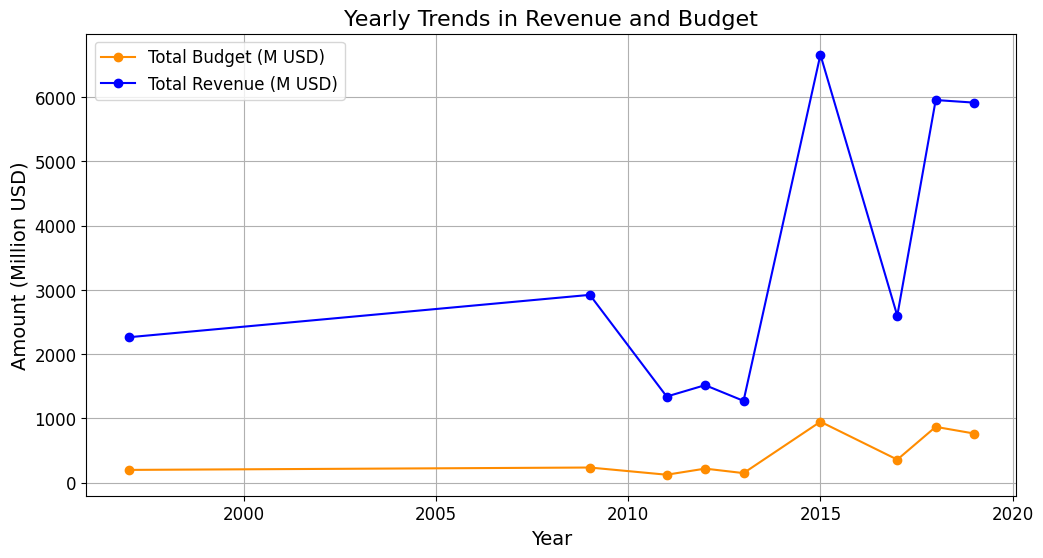

In [77]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert release_date to datetime and extract the release year
cleaned_movies_df['release_year'] = pd.to_datetime(cleaned_movies_df['release_date']).dt.year

# Step 2: Group by release year and calculate total revenue and total budget
yearly_trends = cleaned_movies_df.groupby('release_year')[['budget_musd', 'revenue_musd']].sum().reset_index()

# Step 3: Plot revenue and budget trends over the years
plt.figure(figsize=(12, 6))

# Plot total budget trends
plt.plot(
    yearly_trends['release_year'],
    yearly_trends['budget_musd'],
    label='Total Budget (M USD)',
    color='darkorange',
    marker='o'
)

# Plot total revenue trends
plt.plot(
    yearly_trends['release_year'],
    yearly_trends['revenue_musd'],
    label='Total Revenue (M USD)',
    color='blue',
    marker='o'
)

# Step 4: Customize the plot
plt.title('Yearly Trends in Revenue and Budget', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount (Million USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)  # Add grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


ROI Distribution by Genre

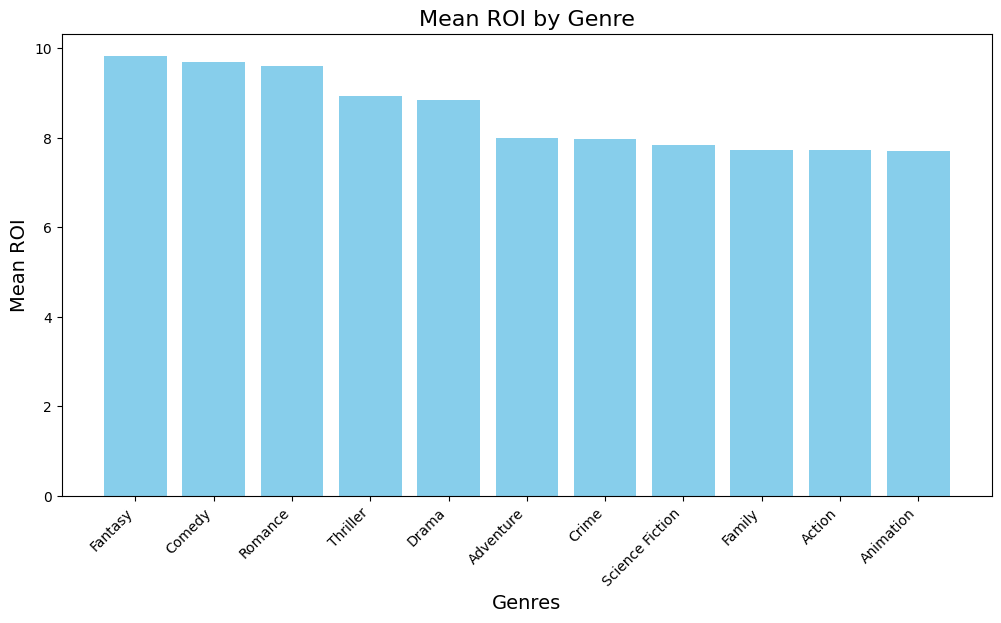

In [65]:
# Step 1: Calculate Mean ROI for Each Genre
mean_roi_by_genre = genre_df.groupby('genres')['ROI'].mean().reset_index()

# Step 2: Sort genres by mean ROI in descending order
mean_roi_by_genre = mean_roi_by_genre.sort_values(by='ROI', ascending=False)

# Step 3: Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(mean_roi_by_genre['genres'], mean_roi_by_genre['ROI'], color='skyblue')

# Add labels and title
plt.title('Mean ROI by Genre', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Mean ROI', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate genre labels for better readability

# Show the plot
plt.show()

Popularity vs. Rating

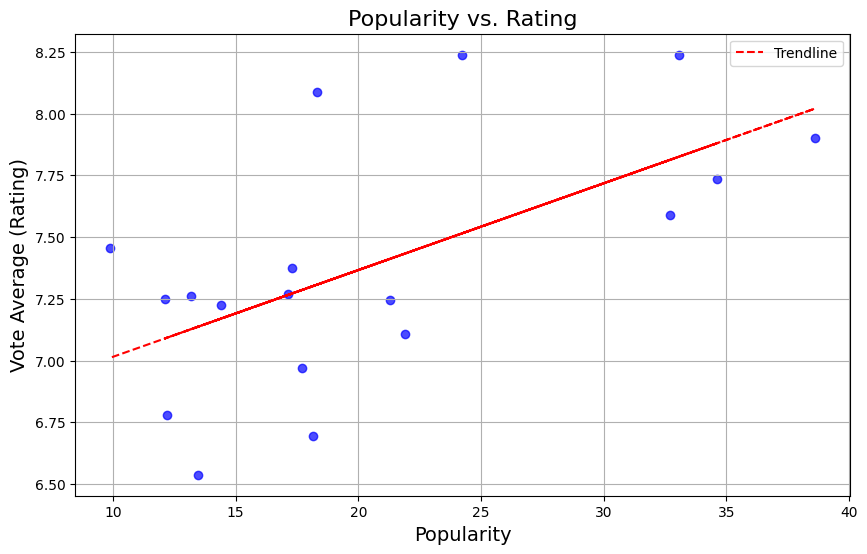

In [69]:
import numpy as np  # Import numpy for trendline calculation

# Step 1: Filter valid data for popularity and rating
valid_data = cleaned_movies_df[
    (cleaned_movies_df['popularity'].notna()) & 
    (cleaned_movies_df['vote_average'].notna())
]

# Step 2: Create scatter plot for Popularity vs Rating
plt.figure(figsize=(10, 6))  # Set figure size

# Scatter plot
plt.scatter(
    valid_data['popularity'], 
    valid_data['vote_average'], 
    alpha=0.7,  # For transparency
    color='blue'
)

# Step 3: Add a trendline using numpy
z = np.polyfit(valid_data['popularity'], valid_data['vote_average'], 1)  # Linear regression
p = np.poly1d(z)
plt.plot(valid_data['popularity'], p(valid_data['popularity']), color='red', linestyle='--', label='Trendline')

# Step 4: Customize the plot
plt.title('Popularity vs. Rating', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Vote Average (Rating)', fontsize=14)
plt.grid(True)  # Add gridlines for better readability
plt.legend()  # Add legend
plt.show()


Yearly Trends in Box Office Performance

C:\Users\DEVICES\AppData\Local\Temp\ipykernel_10528\2661868691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movies_df['release_year'] = pd.to_datetime(cleaned_movies_df['release_date']).dt.year


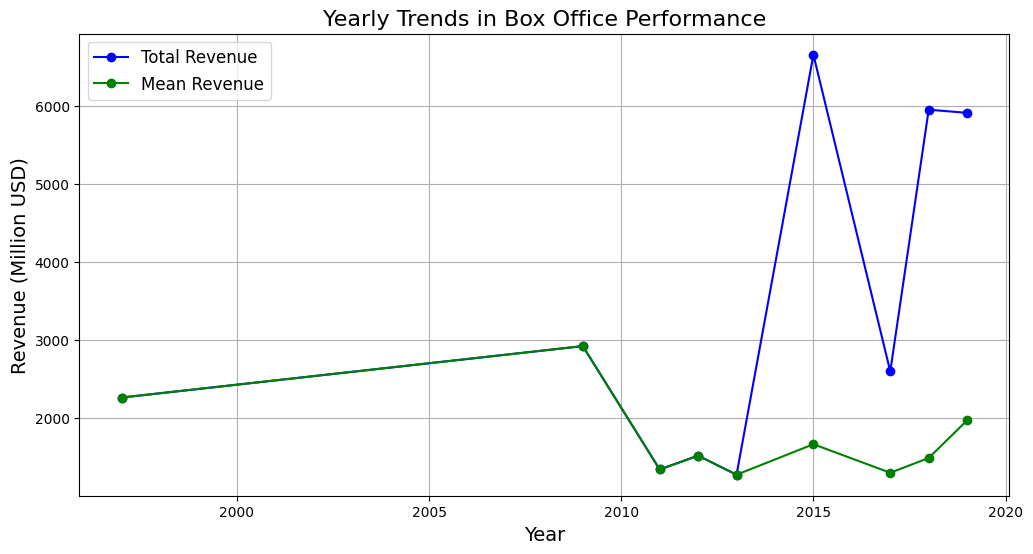

In [70]:
# Step 1: Extract the release year from the 'release_date' column
cleaned_movies_df['release_year'] = pd.to_datetime(cleaned_movies_df['release_date']).dt.year

# Step 2: Group by release year and calculate total revenue and mean revenue
yearly_revenue_stats = cleaned_movies_df.groupby('release_year')['revenue_musd'].agg(['sum', 'mean']).reset_index()
yearly_revenue_stats.columns = ['Year', 'Total Revenue (M USD)', 'Mean Revenue (M USD)']

# Step 3: Plot yearly trends
plt.figure(figsize=(12, 6))  # Set figure size

# Plot total revenue
plt.plot(yearly_revenue_stats['Year'], yearly_revenue_stats['Total Revenue (M USD)'], label='Total Revenue', color='blue', marker='o')

# Plot mean revenue
plt.plot(yearly_revenue_stats['Year'], yearly_revenue_stats['Mean Revenue (M USD)'], label='Mean Revenue', color='green', marker='o')

# Customizations
plt.title('Yearly Trends in Box Office Performance', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenue (Million USD)', fontsize=14)
plt.legend(fontsize=12)  # Add legend
plt.grid(True)  # Add gridlines
plt.show()


Comparison of Franchise vs. Standalone Success

C:\Users\DEVICES\AppData\Local\Temp\ipykernel_10528\3035611462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_movies_df['movie_type'] = cleaned_movies_df['belongs_to_collection'].apply(


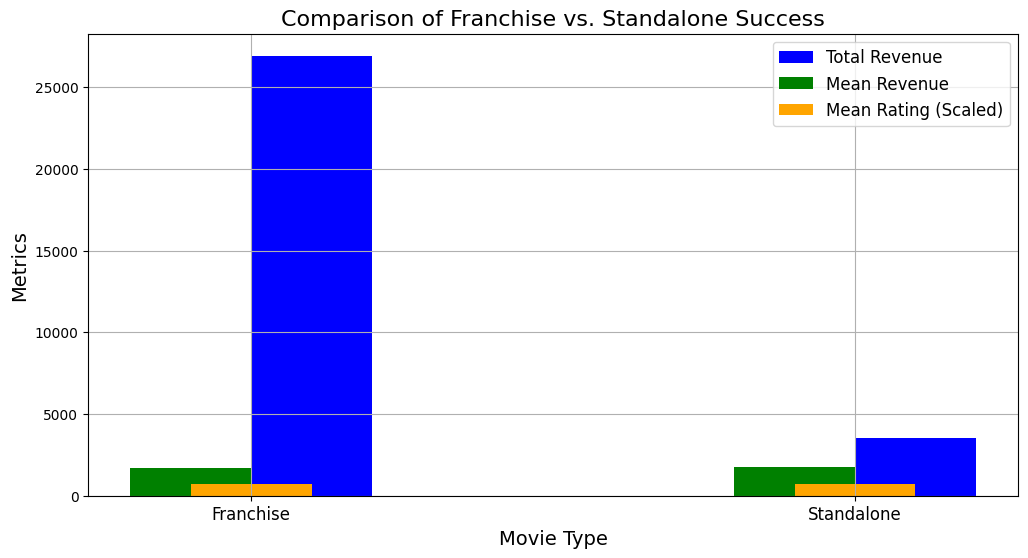

In [72]:
# Step 1: Categorize movies into "Franchise" and "Standalone"
cleaned_movies_df['movie_type'] = cleaned_movies_df['belongs_to_collection'].apply(
    lambda x: 'Franchise' if pd.notna(x) else 'Standalone'
)

# Step 2: Group by movie type and calculate metrics
movie_type_stats = cleaned_movies_df.groupby('movie_type').agg(
    {'revenue_musd': ['sum', 'mean'], 'vote_average': 'mean'}
).reset_index()
movie_type_stats.columns = ['Movie Type', 'Total Revenue (M USD)', 'Mean Revenue (M USD)', 'Mean Rating']

# Step 3: Visualization
plt.figure(figsize=(12, 6))

# Create bar plots
x = movie_type_stats['Movie Type']
total_revenue = movie_type_stats['Total Revenue (M USD)']
mean_revenue = movie_type_stats['Mean Revenue (M USD)']
mean_rating = movie_type_stats['Mean Rating']

width = 0.2  # Width of bars

# Total Revenue Bar
plt.bar(x, total_revenue, width=0.2, label='Total Revenue', color='blue', align='edge')

# Mean Revenue Bar
plt.bar(x, mean_revenue, width=-0.2, label='Mean Revenue', color='green', align='edge')

# Mean Rating Bar
plt.bar(x, mean_rating * 100, width=-0.2, label='Mean Rating (Scaled)', color='orange', align='center')

# Add labels, title, and legend
plt.title('Comparison of Franchise vs. Standalone Success', fontsize=16)
plt.xlabel('Movie Type', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12)
plt.show()
